In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

Load wine dataset

In [4]:
columns = ["idx", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols",
		   "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

wine_df = pd.read_csv("wine.data", names=columns, sep=",")
wine_df.set_index("idx", inplace=True)

wine_df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
idx,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835


In [5]:
wine_df.isna().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

#### Divide wine df to test nad treining sets

In [16]:
X = wine_df
Y = wine_df.index
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_test.shape, X_train.shape)
X_test.head()

(36, 13) (142, 13)


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
idx,,,,,,,,,,,,,
1,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
3,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
2,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510


#### Normalization

Normalizacja (standaryzacja) danych polega na przekształceniu każdej cechy tak, aby miała średnią 0 i odchylenie standardowe 1. Dzięki temu każda wartość reprezentuje odchylenie od średniej danej cechy.

- **Algorytmy oparte na odległości**, takie jak `KNeighborsClassifier`, są wrażliwe na skalę cech – normalizacja zapobiega dominacji jednej cechy nad innymi.
- Dla `RandomForestClassifier` – normalizacja **nie jest wymagana**, ponieważ drzewa decyzyjne są niewrażliwe na skalę danych.


In [21]:
scaler = sk.preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
idx,,,,,,,,,,,,,
1,0.808733,0.637319,0.715786,-1.241280,1.065567,0.646637,1.027242,-1.549321,0.089361,0.018252,0.015517,1.066134,0.365487
1,1.506217,1.461953,0.284492,-0.166513,0.723081,0.882684,0.647481,-0.532235,-0.615595,0.078527,-0.370294,1.024444,1.145552
3,-0.060063,0.382910,1.218962,0.443490,-0.304379,-1.178796,-1.501170,1.267226,-1.475296,-0.197015,-0.798972,-0.393023,-0.447771
1,0.918862,-0.766315,1.218962,0.879206,0.038108,1.118731,1.247104,-0.610472,1.327331,0.276573,1.001477,0.162846,1.826033
2,-0.745310,-1.055814,-1.584448,0.036821,-1.537330,-0.281816,-0.002111,-0.766947,-0.976669,-0.162572,0.701402,1.232895,-0.746519


#### Wine dataset trening for `KNeighborsClassifier` nad `RandomForestClassifier`

In [23]:
knn = sk.neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled_df, Y_train)

rf = sk.ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled_df, Y_train)

RandomForestClassifier(random_state=42)

#### Prediction

In [24]:
Y_pred_knn = knn.predict(X_test_scaled_df)
Y_pred_rf = rf.predict(X_test_scaled_df)

#### Clasification metrics

- **accuracy score** - it computes subset accuracy what means ratio of true predictions to all numnber of predictions

- **precision score** - computes the ratio of true positives (tp) to sum of true positives and false positives (fp) = tp / (tp + fp)

- **recall score** - computes the ratio of true positives (tp) to sum of true positives and false negatives (fn) = tp / (tp + fn)

- **f1 score** - is the harmonic mean of the precision and recall metrics = 2 * tp / 2 * tp + fp + fn

- **confusion matrix** - matrix with dimension j x i where the j is the number of observation goruped in j groups and i are group of predictions, so in binary classification there will be 4 metric numbers: true positives, true negatives, false positives, false negatives


A **classification report** is a summary of key evaluation metrics for classification models. It provides the following metrics **for each class**:

- **Precision**: The proportion of positive predictions that are correct.
- **Recall**: The proportion of actual positives that were correctly predicted.
- **F1-score**: The harmonic mean of precision and recall (balances both).
- **Support**: The number of actual occurrences of each class in the dataset.

It also includes **macro**, **weighted**, and **accuracy** scores across all classes.

📊 KNeighborsClassifier Evaluation:
Accuracy: 0.9444444444444444
Precission (macro): 0.9407407407407407
Recall (macro): 0.9523809523809524
F1 Score (macro): 0.9432568783481562

Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



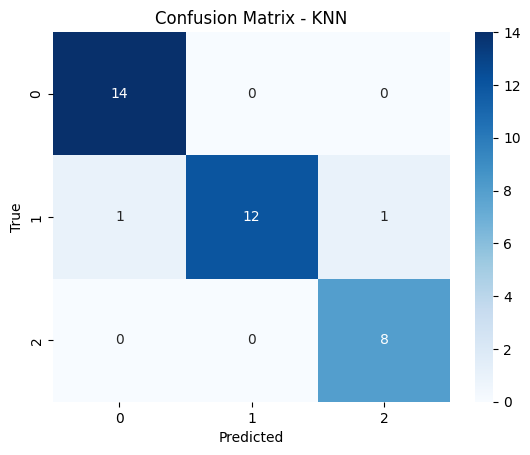


📊 RandomForestClassifier Evaluation:
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



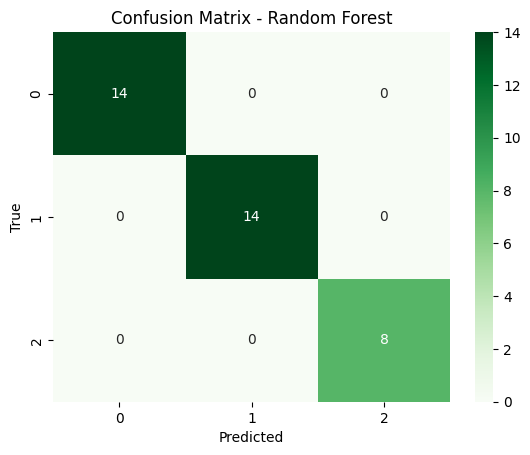

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("📊 KNeighborsClassifier Evaluation:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_knn))
print("Precission (macro):", precision_score(Y_test, Y_pred_knn, average='macro'))
print("Recall (macro):", recall_score(Y_test, Y_pred_knn, average='macro'))
print("F1 Score (macro):", f1_score(Y_test, Y_pred_knn, average='macro'))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_knn))

cm_knn = confusion_matrix(Y_test, Y_pred_knn)
sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


print("\n📊 RandomForestClassifier Evaluation:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("Precision (macro):", precision_score(Y_test, Y_pred_rf, average='macro'))
print("Recall (macro):", recall_score(Y_test, Y_pred_rf, average='macro'))
print("F1 Score (macro):", f1_score(Y_test, Y_pred_rf, average='macro'))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_rf))

cm_rf = confusion_matrix(Y_test, Y_pred_rf)
sns.heatmap(cm_rf, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


#### Classiication metrics interpretation

`KNeighborsClassifier` model:
The prediction for this model is almost 100 % of accuracy. \
There are mismatches in the predicion of second species class, where one of these are predicted as 3-rd class and one as 1-st class.

`RandomForestClassifier` model:
This model have 100 % accuracy.

---

**Models Disrepancy**

---

Model **RandomForestClassifier** potrafi wykryć istotne wzorce w danych, na przykład:

- **Klasa 1**: wysoki poziom alkoholu, niska kwasowość,
- **Klasa 2**: średni poziom magnezu i fenoli,
- **Klasa 3**: niski poziom intensywności koloru, wysoki wskaźnik **OD280/OD315**.

Na tej podstawie Random Forest może stworzyć przejrzyste reguły decyzyjne, skutecznie rozróżniając między klasami.

Z kolei **KNeighborsClassifier (KNN)** opiera swoje decyzje wyłącznie na **podobieństwie (odległości)** między punktami w przestrzeni cech. W sytuacji, gdy cechy chemiczne różnych gatunków win częściowo się pokrywają, KNN może mieć trudności z trafną klasyfikacją — prowadzi to do błędów predykcji.

Różnice w skuteczności wynikają z **odmiennych mechanizmów działania modeli**:

- **RandomForestClassifier**:  
  Uczy się **zależności między cechami a klasami** i potrafi modelować **nieliniowe granice decyzyjne**.
  
- **KNeighborsClassifier**:  
  Działa lokalnie, porównując punkty na podstawie **metryki odległości**. Jest **mniej skuteczny**, gdy klasy są blisko siebie lub **granice między klasami są nieliniowe**.

